# Assignment 3: Neural networks in natural language processing

### Due Date: Oct 30 (both sections)

### Grade (100 pts, 10%)

#### Your Name:

#### Your EID:

*Note: This assignment covers material from the recording, notes, demo, and suggested readings from Lecture-08*

---

## Questions

### 1. Dropout (50 pts)

Dropout is a regularization technique that randomly sets units in each activation layer, $a \in \mathbb{R}^{D}$, to zero and then multiplies the resultant vector elementwise by a constant $\gamma$ according to:

$$a_{dropout} \leftarrow  \gamma H \odot a$$

where $\odot$ represents the element-wise product operator and $H \in \{0, 1\}^D$ is a mask with entries drawn from 

$$\begin{cases} p(0) &= p_{dropout} \\ p(1) &= 1 - p_{dropout} \end{cases}$$

Select a scaling factor ${\gamma}$ that ensures the expected value over the activation layer remains invariant to the above operation, $E\big[ a_{dropout} \big] = E\big[ a \big]$, and provide rationale for your selection.

*Hint: You want to show that*

$$
\sum_{i=1}^D a_i = \gamma \sum_{i=1}^D a_{dropout, i}
$$

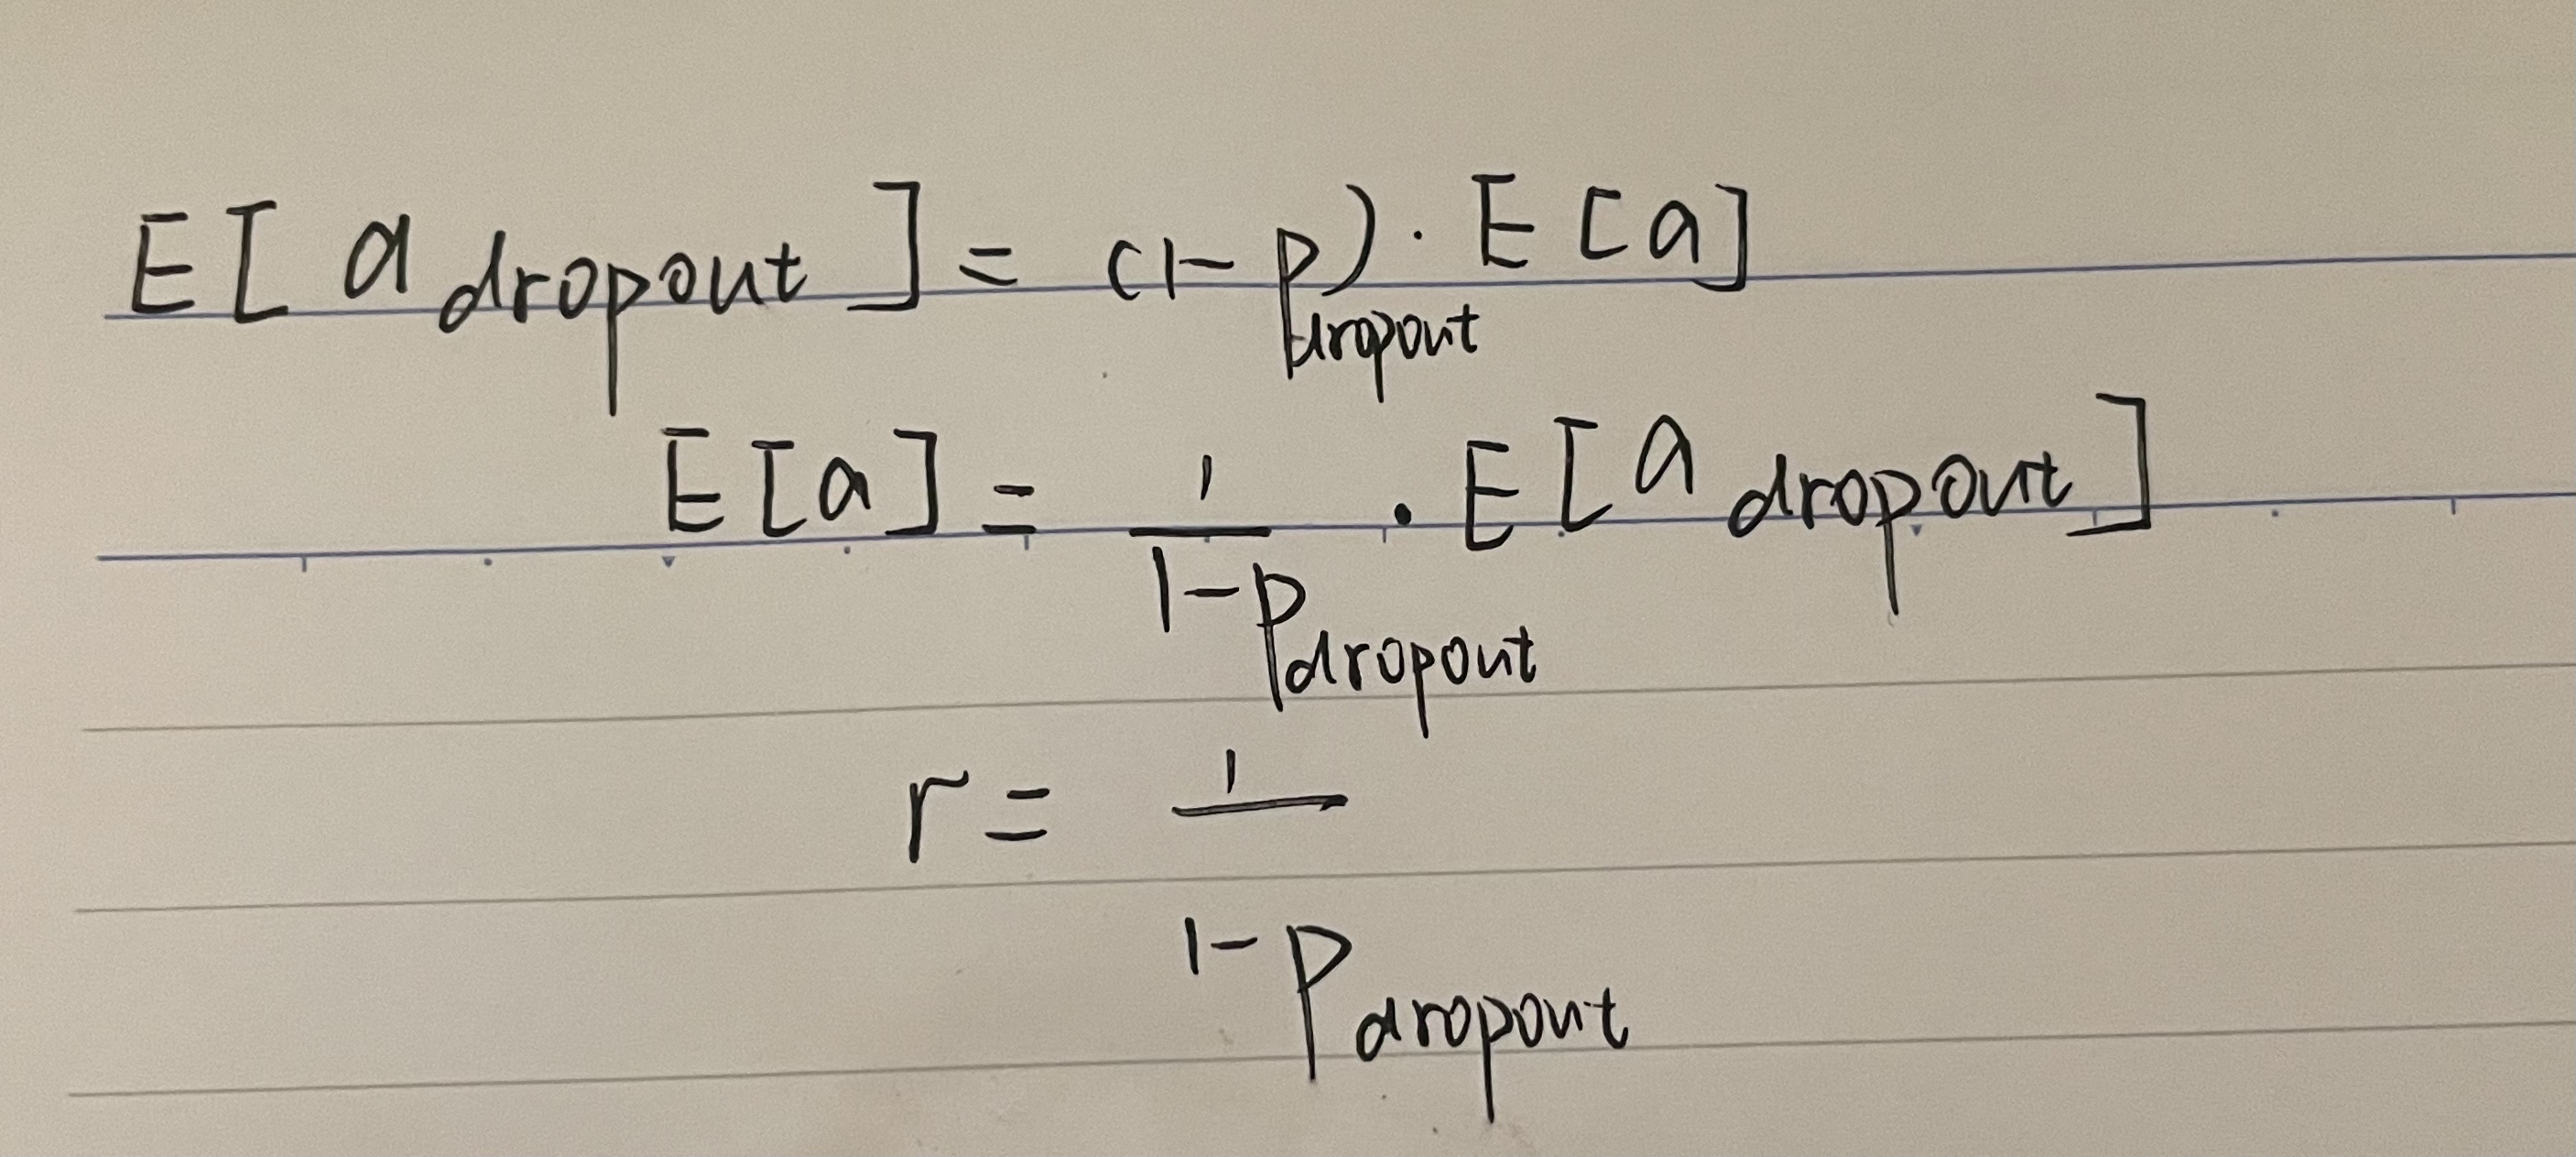

In [4]:
from IPython.display import Image
Image("./nlp.jpg",width=700,height=800)

### 2. Convolutions (50 pts)

Consider a sequence of $T$ token embeddings, $Z \in \mathbb{R}^{T \times D}$, for which $D=3$:

In [3]:
import numpy as np

Z = np.array([
    [1.3,   0.4, -0.2],
    [-3.1,  1.1,  2.1],
    [0.9,   2.8, -1.5],
    [1.3,   2.4,  0.1],
    [1.0,   1.0,  0.5],
    [3.0,  -1.4, -0.2],
    [-0.7,  1.8,  1.3]
])

and a set of convolutional filters, $W=\{ w^{(1)}, w^{(2)} \}$, and corresponding filter widths $S=\{ s^{(1)}, s^{(2)}  \}$:

In [4]:
w1 = np.array([
    [1, 1, 1],
    [1, 1, 1]
])

w2 = np.array([
    [2, 2, 2],
    [2, 2, 2],
    [2, 2, 2]
])

W = [w1, w2]

S = [2, 3]

In Lecture 08 we discussed a set of operations that maps $Z \in \mathbb{R}^{T \times D}$ onto $Z' \in \mathbb{R}^{N_F D}$ (in this problem $N_F = 2$). This involved three steps:

1. **Convolution**: The convolutional operation produces $N_F$ feature maps, $B^{(n)} \in \mathbb{R}^{(T - s^{(n)} + 1) \times D}$, where $n=\{1, \dots, N_F\}$, according to:

$$
\forall_{t \in \{ 1, \dots, T - s^{(n)} + 1 \} } \; B^{(n)}_{t,j} = \sum_{t'=1}^{S^{(n)}} w^{(n)}_{t',j} \; Z_{t+t'-1, \ j}
$$

2. **Max pooling**: The max pooling operation computes the max over the sequence dimension in each feature map, $ B_{maxpool}^{(n)} \in \mathbb{R}^D$, according to:

$$
B_{maxpool, j}^{(n)} = \underset{1 \leq t' \leq T - s^{(n)} + 1 }{\max} B^{(n)}_{t', j}
$$

3. **Concatenation**: The resultant set of $N_F$ feature vectors are then concatenated into a single vector $Z'$ according to:

$$
Z' = \big[ B_{maxpool}^{(1)}, \dots, B_{maxpool}^{(n)}, \dots,  B_{maxpool}^{(N_F)}  \big] \in \mathbb{R}^{D \cdot N_F}
$$

In the cell below, perform these three operations to produce $Z' \in \mathbb{R}^6$ and print it.

*Hint: The max pooling operation computes the maximum over each column in $B^{(n)}$*

In [73]:
# Your code goes here
def conv(Z, w):
    s,T = len(w),len(Z)
    ret = []
    for k in range(T-s+1):
        s_tmp = []
        for i in range(s):
            s_tmp.append(Z[k-1+i])
        s_tmp = np.array(s_tmp)
        s_tmp = s_tmp*w
        ret.append(s_tmp.sum(0))
    return np.array(ret)

def maxpool(B):
    return B.max(0)

In [78]:
B1 = conv(Z, w1)
Bmax1 = maxpool(B1)
B2 = conv(Z, w2)
Bmax2 = maxpool(B2)
Z1 = np.concatenate([Bmax1, Bmax2])

In [79]:
Z1

array([ 4. ,  5.2,  1.9, 10.6, 12.6,  6.4])